# 빅데이터 마이닝 수시과제, 텍스트 분석   
## 2031634 노혜림

### 웹사이트 선정 : Googe PlayStore 
 넷마블 신작 모바일 게임 '제 2의 나라'의 사용자 리뷰 분석

### 필요 패키지 로드

In [ ]:
# 한글 폰트(나눔고딕) 설치 및 적용
!apt-get update -qq
# 나눔 폰트 설치
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 161180 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
import numpy as np
import csv

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
# 폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 실행
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 
# 설치된 나눔글꼴중 원하는 폰트의 전체 경로 가져오기 
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
fm._rebuild()  # 폰트 적용

NanumGothic Eco


### 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 참고 사이트
 - [참고1](https://ai-run.tistory.com/47) Google Colab 에서 Selenium Webdriver 사용
 - [참고2](https://western-sky.tistory.com/51) Play Store 리뷰 크롤링 참고 코드 1
 - [참고3](https://youtu.be/QGKLVzG0Jd8) Play Store 리뷰 크롤링 참고 코드 2
 - [참고4](https://wikidocs.net/book/2155) Word Embedding 과 Topic Modeling

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # 내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

# 제 2의 나라
# 모든 리뷰 보기 : showAllReviews=true
# 한국 서버 : hl=ko&gl=US
url = "https://play.google.com/store/apps/details?id=com.netmarble.enn&showAllReviews=true&hl=ko&gl=US"
driver.get(url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
SCROLL_PAUSE_TIME = 1.5 
last_height = driver.execute_script("return document.body.scrollHeight") 

while True :
  print(last_height)
  for i in range(10): 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") 
    time.sleep(SCROLL_PAUSE_TIME) 
  
  try :
    # load more
    driver.find_element_by_xpath("//span[@class='RveJvd snByac']").click()
  except :
    print('')
  new_height = driver.execute_script("return document.body.scrollHeight") 

  if new_height == last_height:
     break 
  last_height = new_height

13584

56402



In [ ]:
import time, os
from datetime import datetime

In [ ]:
df = pd.DataFrame(columns = ['date', 'name', 'comment', 'rating', 'helpful'])

In [ ]:
reviews = driver.find_elements_by_xpath('//*[@jsname="fk8dgd"]//div[@class="d15Mdf bAhLNe"]')
print(len(reviews))

for review in reviews :
  soup = bs(review.get_attribute('innerHTML'), 'html.parser')

  name = soup.find('span', {'class':'X43Kjb'}).text
  
  rating = int( soup.find('div', role='img').get('aria-label')[10:11] ) 
  
  date = soup.find('span', {'class':'p2TkOb'}).text
  date = datetime.strptime(date, '%Y년 %m월 %d일')
  date = date.strftime('%Y-%m-%d')
  
  helpful = soup.find('div', {'class' : 'jUL89d y92BAb'}).text
  if not helpful : 
    helpful = 0
  
  comment = soup.find('span', {'jsname':'fbQN7e'}).text
  if not comment :
    comment = soup.find('span', {'jsname':'bN97Pc'}).text

  df = df.append({
      'date':date,
      'name':name,
      'comment':comment,
      'rating':rating,
      'helpful':helpful
  }, ignore_index=True)


200


In [ ]:
df.head()

,date,name,comment,rating,helpful
0,2021-07-01,김지혜,"아니 게임을 하겠다는거에요 먼가요. 요즘시대에 말도안되게 방향조작,시선조작,무빙도안...",1,67
1,2021-06-29,오종화,"먼저, 훌륭한 그래픽과 다양한 컨텐츠로 재밌는 게임 만들어주셔서 감사합니다. 저도 ...",5,7
2,2021-06-12,전예진,"그래픽이랑 음악은 좋음! 애니 세상에와있는 느낌?모험 기록 등에 모으는게 많은데, ...",3,32
3,2021-06-19,김희수,"오픈 초반이라 어느정도 이해는 하지만, 뽑기 버그로 뽑기권이랑 화폐 많이 날리고는 ...",3,19
4,2021-06-18,uha 2,게임에 대한 비평은 다른분이 많이 했으니 제쳐두고. 몇일전부터 던전 입장티켓 복사버...,1,64


In [ ]:
print(df.shape)
print(df.isna().sum())

(200, 5)
date       0
name       0
comment    0
rating     0
helpful    0
dtype: int64


In [ ]:
driver.close()

## 분석

In [ ]:
# 설치 시 [bs4] 에러가 떠도 무시하시고 진행해주세요. -> !중요 Restart Runtime을 누르지 말아주세요
!pip install konlpy #Konlpy 설치

# 한글 분석을 위한 패키지
from konlpy.tag import Okt #twitter 형태소 분석기

     |████████████████████████████████| 19.4MB 38.9MB/s 
     |████████████████████████████████| 450kB 25.8MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
# 부정점수: 중립점수: 긍정점수' 형식의 감정 사전 (lexicon) 만들기
lexicon = dict()

with open('/content/drive/My Drive/21-1/data/polarity.csv', 'r', encoding='utf-8-sig') as polarity:
    next(polarity) # csv 파일에서 첫 행(컬럼 이름) 건너뛰기
    for line in csv.reader(polarity):
        key = str()
        for word in line[0].split(';'):
            key += word.split('/')[0]

        lexicon[key] = {'Neg': line[3], 'Neut': line[4], 'Pos': line[6]}

#print(lexicon)

{'가*': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*있': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*있었': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가*ㄴ다*': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가': {'Neg': '0.333333333', 'Neut': '0', 'Pos': '0.555555556'}, '가되': {'Neg': '0.363636364', 'Neut': '0.272727273', 'Pos': '0.363636364'}, '가되ㄴ': {'Neg': '0', 'Neut': '1', 'Pos': '0'}, '가되ㄹ': {'Neg': '0', 'Neut': '1', 'Pos': '0'}, '가되어': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가되어야지요': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가아니': {'Neg': '0.666666667', 'Neut': '0.166666667', 'Pos': '0.166666667'}, '가아니ㄴ가': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가아니면': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가아니ㅂ니다': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가능': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가가능하': {'Neg': '0', 'Neut': '0', 'Pos': '1'}, '가가장': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가장많이': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가가장어렵': {'Neg': '1', 'Neut': '0', 'Pos': '0'}, '가굵': {'Neg': '0', 'Neut': '0', 

In [ ]:
df.head(30)

,date,name,comment,rating,helpful
0,2021-07-01,김지혜,"아니 게임을 하겠다는거에요 먼가요. 요즘시대에 말도안되게 방향조작,시선조작,무빙도안...",1,67
1,2021-06-29,오종화,"먼저, 훌륭한 그래픽과 다양한 컨텐츠로 재밌는 게임 만들어주셔서 감사합니다. 저도 ...",5,7
2,2021-06-12,전예진,"그래픽이랑 음악은 좋음! 애니 세상에와있는 느낌?모험 기록 등에 모으는게 많은데, ...",3,32
3,2021-06-19,김희수,"오픈 초반이라 어느정도 이해는 하지만, 뽑기 버그로 뽑기권이랑 화폐 많이 날리고는 ...",3,19
4,2021-06-18,uha 2,게임에 대한 비평은 다른분이 많이 했으니 제쳐두고. 몇일전부터 던전 입장티켓 복사버...,1,64
5,2021-06-28,김성용,승급석이란게 희박하더라도 어디지역에는 떨어져야. 노가다를 통해서 전투력이 올라서 다...,1,3
6,2021-06-13,찰나,"개발자님들 수고하신건 알겠는데, 무과금도 할 수 있게끔 했다는 말은 완전 뒤통수 때...",2,283
7,2021-06-10,도비빔,빨리 보라고 1점 남깁니다. 후에 수정하겠습니다. 일단 게임 캐릭 생성하고 16레벨...,1,50
8,2021-06-16,Juyoung Park,시대에 뒤떨어지는 과금유도.. 안타까워여. 회사가 돈이 급한가..? 게임을 먼저 즐...,3,11
9,2021-06-12,최수연,그래픽 더빙 맵까지 전부 예쁘고 좋습니다. 그런데 게임이 재미가 없어요. 컨텐츠는 ...,3,28


In [ ]:
#불용어 정의: 문장에서 내용을 나타내는데 큰 역할을 하지 않은 기능어. 
stop_words = ["등", "이", "하", "않", "있", "대하", "하지만", "지", "일", "속", "하", "되", "및", "오",
                 "서", "있다", "것", "되었습니다", "하는", "한다", "했다", "주", "하였습니다", "대", "했습니다", "하여", "해보세요",
                  "있는", "입니다", "있음", "되거나", "할", "있는", "관련", "해", "패","시브",
                  "를", "을", "나", "그", "위", "고","와", "하며", "의", "가",
                 "하겠습니다", "해야", "몇", "는", "전", "이를","하고", '시킵니다', '된', '있습니다', '제',
                 "있는데요", "있는데", "볼", "로", "은", "총", "우","보였다", "하기", "후", "간", "이번", "때","원",
                 "합시다", "과", "저","분","방","임", "된다","날","함", "있으며","개", "될","며", "보자","합니다","안녕하세요",
                 "같습니다","조","다", "스","가를", "얜","얘", "경우", "무엇","대한","내용", "위해", "이후","현재",
                 "우리", "없는", "모두","관","내","때문","어떻게","어디", "세", "사","회", "미","에이", "료", "게시","물", "그린",
                 "한",  "하겠다", "리","두었다", "또한", "들어","통해", "바란다", "다음"," 이어",
                 "됨", "됨", "됌", "또", "됐다", "매일", "점","출처", "기반", "예정", "들있잖아", "은줄",
                "오늘", "더","하나", "게임", "제2의나라", "보", "먼저", "근데", "아니", "요즘", "먼가요", "안되게", "안되고", "그것", "하십니까", "써서", "했으면", "제발", "좀",
                 "재", "해서", "같다", "곳", "역시","라며", "처", "첫", "보면", "번", "각각", "예", "와있는", "많이", "하시는", "받고", "되고", "나아질", "되지", "않으리라", "다만", "기본", "로서","물론", "생각"
                 "이어", "정", "보기", "워", "아닌", "훗날", "아니더라도", "너무", "하겠다는거에요", "솔직히", "하면서", "모든", "아니라", "이런", "같아요", "수정", "수", "되는", "사실", "없이", "있고", "특히", 
              "이렇게", "있어서", "그냥", "다른", "않고", "가끔", "등등", "음", "일단",
              '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 텍스트 토큰화 작업 함수 
def get_token(text):
    pos = []
    tokenizer = Okt() #twitter 형태소 분석기를 불러옵니다.

    # 정규 표현식을 통한 한글 외 문자 제거
    text = text.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

    if isinstance(text, float) == True: # 주어진 텍스트가 공백일 시 건너뜁니다.
        tokens = "Nothing"
    else:
        tokens = tokenizer.pos(text) 

        # pos : 품사 태깅(Part-of-speech tagging) (예) ('고질라', 'Noun'), ('VS', 'Alpha'), ('.', 'Punctuation')
        # morphs : 형태소 추출 (예) '마지막', '남은', '타이탄', '급', '괴수', '들'
        # nouns : 명사 추출 (예) '마지막', '타이탄', '괴수', '대결', '지구', '하나'

        
    tags = ['Noun', 'Adjective', 'Verb', 'Adverb'] # 형태소 중 명사, 형용사, 동사, 부사만 수집

    for token in tokens:
        if not tokens == "Nothing":
          if token[1] in tags:
            if not token[0] in stop_words: #불용어 제외 
              pos.append(token[0])  #토큰 수집
        else:
           continue

    return pos

In [ ]:
#감성분석 함수 정의
def get_sentiment(token_list):
    cnt = 0 # 평균을 내기 위해 토큰 개수 계산
    pos = 0
    neut = 0
    neg = 0
    sentiment = None
    for token in token_list:
        try:
            #lexicon에 토큰이 없으면 건너뜀
            pos += float(lexicon[token]["Pos"]) # 토큰들의 긍정점수를 구해서 더함 
            neut += float(lexicon[token]["Neut"]) # 토큰들의 중립점수를 구해서 더함
            neg += float(lexicon[token]["Neg"]) # 토큰들의 부정점수를 구해서 더함
            cnt += 1
        except:
            continue
            
    if not cnt == 0:   
        pos = pos/cnt # 게시글의 긍정점수 평균 
        neut = neut/cnt # 게시글의 중립점수 평균 
        neg = neg/cnt # 게시글의 부정점수 평균 

        # 논리구조를 통해 게시글의 최종 감성을 판정 
        # 긍정/중립/부정 점수를 비교해서 가장 높은 점수의 감성을 게시글의 감성으로 판정
        if pos > neg:
            if pos > neut:
                sentiment = "positive"
            else:
                sentiment = "neutral"
        elif pos < neg:
            if neg > neut:
                sentiment = "negative"
            else:
                sentiment = "neutral"
        else:
            if pos > neut:
                sentiment = "positive and negative"
            else:
                sentiment = "neutral"   
                
        return pos, neut, neg, sentiment
    else: 
        return [None, None, None, None]

In [ ]:
result=df
# 감정 분석 결과: 새로운 열 5개 추가
# tokens: 텍스트 토큰화 결과
# pos/nuet/neg: 긍정, 중립, 부정 점수
# sentiment: 최종 감성 평가 결과

result["tokens"] = None
result["pos"] = None
result["neut"] = None
result["neg"] = None
result["sentiment"] = None 
 
for i in range(0, len(result)):
    token_list = get_token(result["comment"][i])
    result["pos"][i], result["neut"][i], result["neg"][i], result["sentiment"][i] = get_sentiment(token_list)
    result["tokens"][i] = token_list

result.info()
display(result.head())

#csv 파일로 저장하기
#file_name = "/content/drive/My Drive/Colab Notebooks/BigMining/app_sentiment.csv"
#result.to_csv(file_name, index = False, encoding = "utf-8-sig")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       200 non-null    object
 1   name       200 non-null    object
 2   comment    200 non-null    object
 3   rating     200 non-null    object
 4   helpful    200 non-null    object
 5   tokens     200 non-null    object
 6   pos        200 non-null    object
 7   neut       200 non-null    object
 8   neg        200 non-null    object
 9   sentiment  200 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


,date,name,comment,rating,helpful,tokens,pos,neut,neg,sentiment
0,2021-07-01,김지혜,"아니 게임을 하겠다는거에요 먼가요. 요즘시대에 말도안되게 방향조작,시선조작,무빙도안...",1,67,"[시대, 말, 방향, 조작, 시선, 조작, 무빙, 채널, 사람, 모으겟다고, 상품,...",0.510256,0.192308,0.237607,positive
1,2021-06-29,오종화,"먼저, 훌륭한 그래픽과 다양한 컨텐츠로 재밌는 게임 만들어주셔서 감사합니다. 저도 ...",5,7,"[훌륭한, 그래픽, 다양한, 컨텐츠, 재밌는, 만들어주셔서, 감사합니다, 친구, 재...",0.57683,0.0701058,0.295966,positive
2,2021-06-12,전예진,"그래픽이랑 음악은 좋음! 애니 세상에와있는 느낌?모험 기록 등에 모으는게 많은데, ...",3,32,"[그래픽, 음악, 좋음, 애니, 세상, 느낌, 모험, 기록, 모으는게, 많은데, 수...",0.543542,0.02375,0.400119,positive
3,2021-06-19,김희수,"오픈 초반이라 어느정도 이해는 하지만, 뽑기 버그로 뽑기권이랑 화폐 많이 날리고는 ...",3,19,"[오픈, 초반, 정도, 이해, 뽑기, 버그, 뽑기, 화폐, 날리고는, 화났었네요, ...",0.448118,0.0464314,0.455588,negative
4,2021-06-18,uha 2,게임에 대한 비평은 다른분이 많이 했으니 제쳐두고. 몇일전부터 던전 입장티켓 복사버...,1,64,"[비평, 했으니, 쳐, 두고, 일전, 던전, 입장, 티켓, 복사, 버그, 글, 계속...",0.297222,0.0388889,0.615278,negative


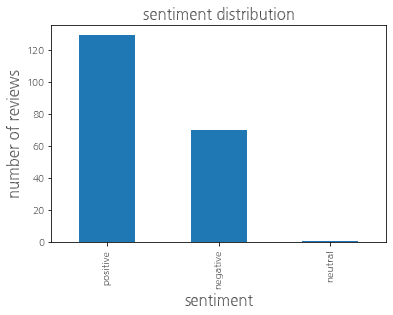

In [ ]:
result['sentiment'].value_counts( ).plot(kind='bar') #sentiment별 빈도수로 bar차트 생성

plt.title('sentiment distribution', fontsize=15)
plt.xlabel('sentiment',fontsize=15)
plt.ylabel('number of reviews',fontsize=15 )   
plt.show()


In [ ]:
pos_result = result[result['sentiment']== "positive"]
pos_result = pos_result.reset_index()
print("긍정판별 리뷰 개수 :", len(pos_result))
pos_result[['comment', 'tokens', 'rating']][0:10]

긍정판별 리뷰 개수 : 129


,comment,tokens,rating
0,"아니 게임을 하겠다는거에요 먼가요. 요즘시대에 말도안되게 방향조작,시선조작,무빙도안...","[시대, 말, 방향, 조작, 시선, 조작, 무빙, 채널, 사람, 모으겟다고, 상품,...",1
1,"먼저, 훌륭한 그래픽과 다양한 컨텐츠로 재밌는 게임 만들어주셔서 감사합니다. 저도 ...","[훌륭한, 그래픽, 다양한, 컨텐츠, 재밌는, 만들어주셔서, 감사합니다, 친구, 재...",5
2,"그래픽이랑 음악은 좋음! 애니 세상에와있는 느낌?모험 기록 등에 모으는게 많은데, ...","[그래픽, 음악, 좋음, 애니, 세상, 느낌, 모험, 기록, 모으는게, 많은데, 수...",3
3,"개발자님들 수고하신건 알겠는데, 무과금도 할 수 있게끔 했다는 말은 완전 뒤통수 때...","[개발자, 수고, 하신건, 알겠는데, 무과, 금도, 있게끔, 했다는, 말, 완전, ...",2
4,빨리 보라고 1점 남깁니다. 후에 수정하겠습니다. 일단 게임 캐릭 생성하고 16레벨...,"[빨리, 보라, 남깁니다, 캐릭, 생, 레벨, 키웠습니다, 명성, 퀘스트, 중, 멈...",1
5,시대에 뒤떨어지는 과금유도.. 안타까워여. 회사가 돈이 급한가..? 게임을 먼저 즐...,"[시대, 뒤, 떨어지는, 과금, 유도, 안타까워여, 회사, 돈, 급한가, 즐길수, ...",3
6,그래픽 더빙 맵까지 전부 예쁘고 좋습니다. 그런데 게임이 재미가 없어요. 컨텐츠는 ...,"[그래픽, 더빙, 맵, 전부, 예쁘고, 좋습니다, 재미, 없어요, 컨텐츠, 많지만,...",3
7,게임 재밌습니다 그런데 문제점이 한두개가 아니네요 일단 성장에대한 성취감이 매우모자...,"[재밌습니다, 문제점, 아니네요, 성장, 성취, 감, 우모, 자릅니다, 거래소, 없...",5
8,오픈 때부터 지금까지 재밌게 하고 있는 유저입니다. 좋은 게임을 만들어 주셔서 감사...,"[오픈, 지금, 재밌게, 유저, 좋은, 만들어, 주셔서, 감사합니다, 느낀, 들입니...",5
9,레벨 40까지 키우면서 1. 무기 펫 마다 속성 5개. 거지같음 2. 재미없는 레이...,"[레벨, 키우면서, 무기, 펫, 마다, 속성, 거지같음, 재미없는, 레이드, 파티,...",1


In [ ]:
neg_result = result[result['sentiment']== "negative"]
neg_result = neg_result.reset_index()
print("부정판별 리뷰 개수 :", len(neg_result))
neg_result[['comment', 'tokens', 'rating']][0:10] # 10개 부정 리뷰 보여주기 

부정판별 리뷰 개수 : 70


,comment,tokens,rating
0,"오픈 초반이라 어느정도 이해는 하지만, 뽑기 버그로 뽑기권이랑 화폐 많이 날리고는 ...","[오픈, 초반, 정도, 이해, 뽑기, 버그, 뽑기, 화폐, 날리고는, 화났었네요, ...",3
1,게임에 대한 비평은 다른분이 많이 했으니 제쳐두고. 몇일전부터 던전 입장티켓 복사버...,"[비평, 했으니, 쳐, 두고, 일전, 던전, 입장, 티켓, 복사, 버그, 글, 계속...",1
2,UI 하난 진짜 잘 만들었네. 어쩌면 오딘보다 은근 재미있는걸지도. 근데. 아무래도...,"[진짜, 만들었네, 어쩌면, 오딘, 은근, 재미있는걸, 지도, 아무래도, 무, 과금...",1
3,재밋구요 오류가 좀잇네요 이마젠 뽑기 하나씩 연속으로 할때 알 까는 순간에 화면이 ...,"[재밋구, 오류, 잇네요, 젠, 뽑기, 연속, 알, 까는, 순간, 화면, 순간, 투...",4
4,늦은감이 없진 않지만 유저들의 요구를 받아주고 업데이트 해줘서 좋습니다. 다만 플레...,"[늦, 은감, 없진, 않지만, 유저, 요구, 받아주고, 업데이트, 해줘서, 좋습니다...",5
5,너무너무 기대하고 사전예약도 하면서 손 꼽아서 기다린 게임인데 음 일단 잦은 오류가...,"[기대하고, 사전예약, 손, 꼽아, 기다린, 잦은, 오류, 많아요, 들면, 뽑기, ...",3
6,오픈때부터 지금까지 플레이해본결과 과금유도가 정도이상으로 심합니다. 캐시아이템들도 ...,"[오픈, 지금, 플레이, 해본, 결과, 과금, 유도, 정도, 이상, 심합니다, 캐시...",3
7,그래픽만 이쁜 흔한 넷마블 과금 유도 mmorpg... 작동이 난잡해요. 스킬 자동...,"[그래픽, 이쁜, 흔한, 넷마블, 과금, 유도, 작동, 난잡해요, 스킬, 자동, 사...",1
8,결혼 전 취미이자 유일한 스트레스 해소방법이였던게 게임이였어요.. 결혼.. 임신과 ...,"[결혼, 취미, 이자, 유일한, 스트레스, 해소, 방법, 였던게, 였어요, 결혼, ...",5
9,재미는 있습니다 하지만 편의성에 많은 불편을 느낍니다 구역이동하는데 일일이 도보로 ...,"[재미, 편의, 많은, 불편, 느낍니다, 구역, 이동, 하는데, 일일이, 도보, 이...",3


## 워드 클라우드 만들기

리뷰에 많이 사용된 단어들을 분석하고 워드 클라우드로 시각화 



In [ ]:
# Word Cloud를 만들기 위해 필요한 패키지를 설치합니다. 
!pip install wordcloud

In [ ]:
#워드 클라우드 분석에 필요한 패키지를 불러옵니다.
from wordcloud import WordCloud
from collections import Counter 

In [ ]:
# 앞서 분석한 토큰들을 words_for_cloud 라는 하나의 리스트로 합침 
words_for_cloud = []
for i in range(0,len(result)):
    token_list = result['tokens'][i]
    words_for_cloud = words_for_cloud + token_list

# 가장 많이 사용된 top 10 단어와 빈도수 출력
frequency = Counter(words_for_cloud).most_common(10)  
print(frequency)

[('과금', 111), ('유저', 80), ('그래픽', 77), ('스토리', 72), ('자동', 70), ('생각', 64), ('퀘스트', 59), ('캐릭터', 58), ('플레이', 55), ('느낌', 48)]


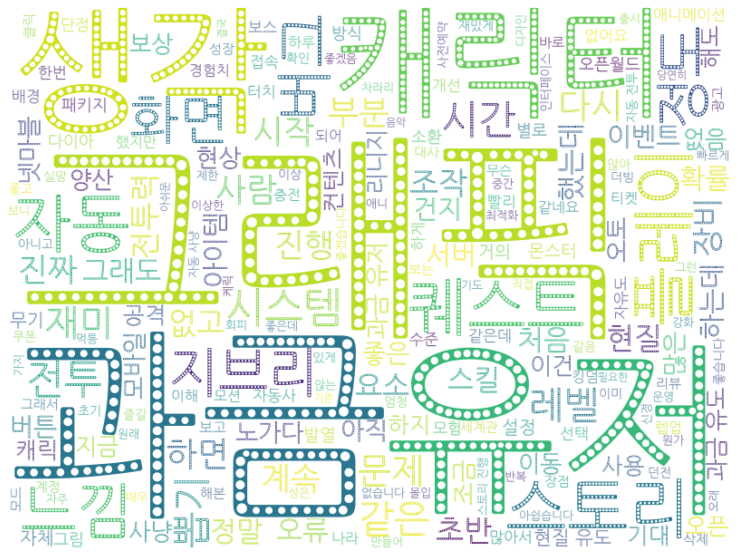

In [ ]:
# 리스트를 문자열 형태로 변환 
words_for_cloud_string = " ".join(words_for_cloud) 

# 워드클라우드 환경 설정합니다. (폰트, 그림 크기, 배경색)
wc = WordCloud(font_path=path, width=800, height=600, background_color = "white")
wordcloud = wc.generate(words_for_cloud_string)
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear:부드럽게, none:이미지를 있는 그대로 보여주기
plt.axis("off")
plt.show()

[('과금', 78), ('유저', 55), ('스토리', 54), ('그래픽', 48), ('캐릭터', 47), ('생각', 45), ('자동', 42), ('전투', 40), ('느낌', 35), ('퀘스트', 34)]


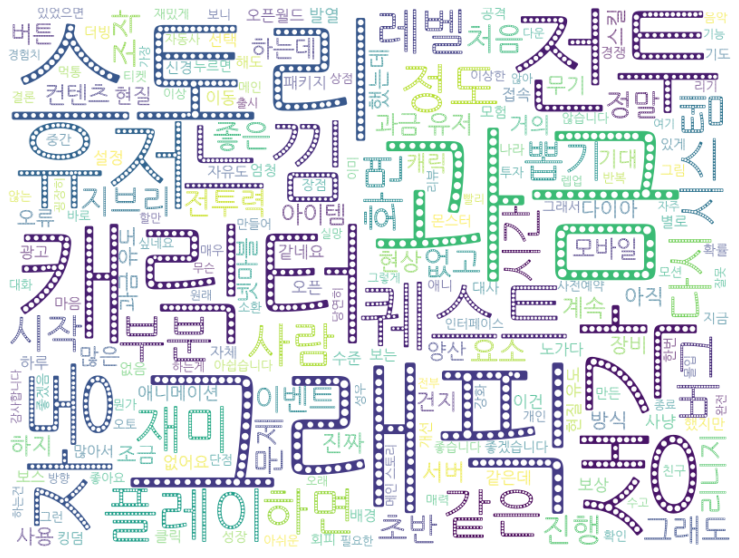

In [ ]:
# 긍정 리뷰의 워드클라우드
# 앞서 분석한 토큰들을 words_for_cloud 라는 하나의 리스트로 합침 
words_for_cloud = []
for i in range(len(pos_result)):
    token_list = pos_result['tokens'][i]
    words_for_cloud = words_for_cloud + token_list

# 가장 많이 사용된 top 10 단어와 빈도수 출력
frequency = Counter(words_for_cloud).most_common(10)  
print(frequency)

# 리스트를 문자열 형태로 변환 
words_for_cloud_string = " ".join(words_for_cloud) 

# 워드클라우드 환경 설정합니다. (폰트, 그림 크기, 배경색)
wc = WordCloud(font_path=path, width=800, height=600, background_color = "white")
wordcloud = wc.generate(words_for_cloud_string)
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear:부드럽게, none:이미지를 있는 그대로 보여주기
plt.axis("off")
plt.show()

[('과금', 33), ('그래픽', 29), ('자동', 28), ('유저', 25), ('퀘스트', 25), ('버그', 23), ('플레이', 21), ('지브리', 21), ('화면', 19), ('생각', 19)]


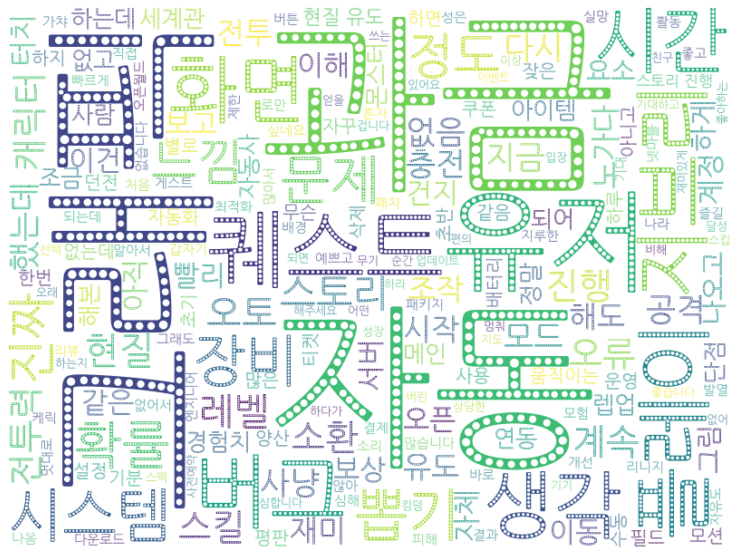

In [ ]:
# 긍정 리뷰의 워드클라우드
# 앞서 분석한 토큰들을 words_for_cloud 라는 하나의 리스트로 합침 
words_for_cloud = []
for i in range(len(neg_result)):
    token_list = neg_result['tokens'][i]
    words_for_cloud = words_for_cloud + token_list

# 가장 많이 사용된 top 10 단어와 빈도수 출력
frequency = Counter(words_for_cloud).most_common(10)  
print(frequency)

# 리스트를 문자열 형태로 변환 
words_for_cloud_string = " ".join(words_for_cloud) 

# 워드클라우드 환경 설정합니다. (폰트, 그림 크기, 배경색)
wc = WordCloud(font_path=path, width=800, height=600, background_color = "white")
wordcloud = wc.generate(words_for_cloud_string)
fig = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear') # bilinear:부드럽게, none:이미지를 있는 그대로 보여주기
plt.axis("off")
plt.show()

## 토픽 모델링

In [ ]:
# 텍스트 분석을 위한 다양한 기능을 제공하는 gensim 패키지 이용
!pip install gensim
#!pip install --upgrade pandas==1.2

In [ ]:
import gensim
from gensim import corpora

In [ ]:
topic = 3      # 추출할 토픽의 개수
keyword = 10   # 각 토픽에 포함할 키워드(단어) 개수

# LDA 토픽모델링 수행
dictionary = corpora.Dictionary(list(result['tokens']))    
corpus = [dictionary.doc2bow(text) for text in list(result['tokens'])]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topic, id2word = dictionary, passes=10)

topic_list = []  # 추출된 토픽과 토픽에 포함된 키워드 저장
for num in range(topic):
    topic_list.append(ldamodel.show_topic(num, keyword))

In [ ]:
# 추출된 토픽과 키워드 출력
for index in range(len(topic_list)):
    print("# 주제", index + 1)
    for topic in topic_list[index]:
        print("\t", topic[0].split("/")[0])

# 주제 1
	 과금
	 스토리
	 자동
	 시스템
	 그래픽
	 겜
	 시간
	 유도
	 생각
	 진행
# 주제 2
	 그래픽
	 플레이
	 퀘스트
	 캐릭터
	 전투
	 화면
	 생각
	 과금
	 지브리
	 자동
# 주제 3
	 유저
	 과금
	 그래픽
	 느낌
	 자동
	 생각
	 스토리
	 정도
	 퀘스트
	 버그


In [ ]:
detokenized_doc = []
for i in range(len(result['tokens'])):
    t = ' '.join(result['tokens'][i])
    detokenized_doc.append(t)

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result['tokens'], size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model_result = model.wv.most_similar('과금')
print(model_result)

[('플레이', 0.9591927528381348), ('전투', 0.9554715752601624), ('스토리', 0.9523645639419556), ('다시', 0.9474940896034241), ('자동', 0.9459803700447083), ('뭐', 0.9459185600280762), ('정도', 0.9439762234687805), ('생각', 0.9429538249969482), ('시스템', 0.9427011013031006), ('캐릭터', 0.9419488906860352)]


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

X = vectorizer.fit_transform(detokenized_doc)
lda_model=LatentDirichletAllocation(n_components=3,learning_method='online',random_state=777,max_iter=1)

In [ ]:
lda_top=lda_model.fit_transform(X)

In [ ]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_, terms, n=10)

Topic 1: [('과금', 1.6), ('소환', 1.5), ('사용', 1.47), ('건지', 1.39), ('시간', 1.28), ('하면', 1.28), ('이벤트', 1.26), ('전투', 1.24), ('플레이', 1.24), ('오류', 1.24)]
Topic 2: [('과금', 2.91), ('자동', 2.19), ('스토리', 2.05), ('유저', 1.95), ('진행', 1.93), ('생각', 1.92), ('정도', 1.92), ('그래픽', 1.91), ('플레이', 1.91), ('지브리', 1.91)]
Topic 3: [('버튼', 1.53), ('버그', 1.52), ('캐릭터', 1.47), ('그래픽', 1.41), ('화면', 1.38), ('레벨', 1.37), ('뽑기', 1.35), ('대사', 1.34), ('다시', 1.33), ('조작', 1.32)]
